In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read the Dataset

In [3]:
data = pd.read_excel('ECOMM DATA.xlsx')

In [4]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
data.shape

(51290, 24)

In [6]:
# drop rowId this is not relevent 
data.drop(columns='Row ID',inplace=True)

In [7]:
print('No.of numerical column:',data.select_dtypes(np.number).shape[1])
print('No.of categorical column:',data.select_dtypes('object').shape[1])

No.of numerical column: 6
No.of categorical column: 15


In [8]:
data.select_dtypes('object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",Medium
51286,US-2014-102288,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,Medium
51287,US-2013-155768,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",High
51288,MX-2012-140767,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",Medium


### Numerical columns

In [9]:
data.select_dtypes(np.number)

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,10024.0,2309.650,7,0.0,762.1845,933.570
1,NaN,3709.395,9,0.1,-288.7650,923.630
2,NaN,5175.171,9,0.1,919.9710,915.490
3,NaN,2892.510,5,0.1,-96.5400,910.160
4,NaN,2832.960,8,0.0,311.5200,903.040
...,...,...,...,...,...,...
51285,NaN,65.100,5,0.0,4.5000,0.010
51286,77095.0,0.444,1,0.8,-1.1100,0.010
51287,93030.0,22.920,3,0.0,11.2308,0.010
51288,NaN,13.440,2,0.0,2.4000,0.003


In [10]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

### Univariate Analysis

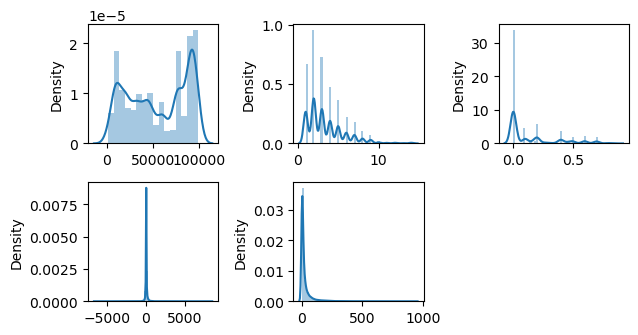

In [12]:
# for numerical columns
num_cols = data.select_dtypes(np.number)
t= 1
for i in num_cols:
    if i != 'Sales':
        plt.subplot(3,3,t)
        sns.distplot(x= data[i])
        t+=1
plt.tight_layout()
plt.show()

#### Check Missing values

In [13]:
data.isnull().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

##### Yes there are missing values in Postal Code

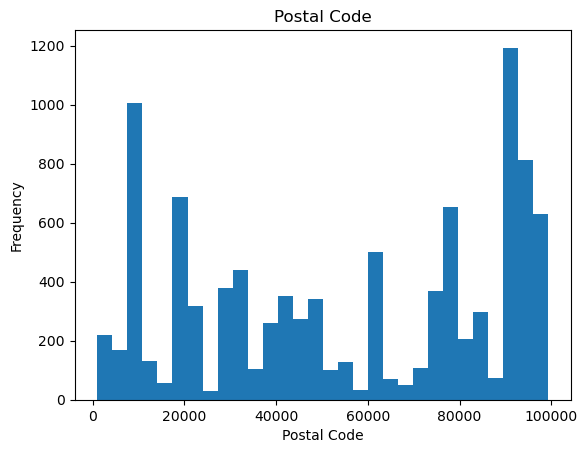

In [19]:
# Distribution of Postal Code
plt.hist(data['Postal Code'],bins=30)
plt.title('Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.show()

In [22]:

# Fill missing values with the mode

data['Postal Code'].fillna(data['Postal Code'].mode()[0], inplace=True)

In [21]:
data.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

#### Order ID graphical Representation

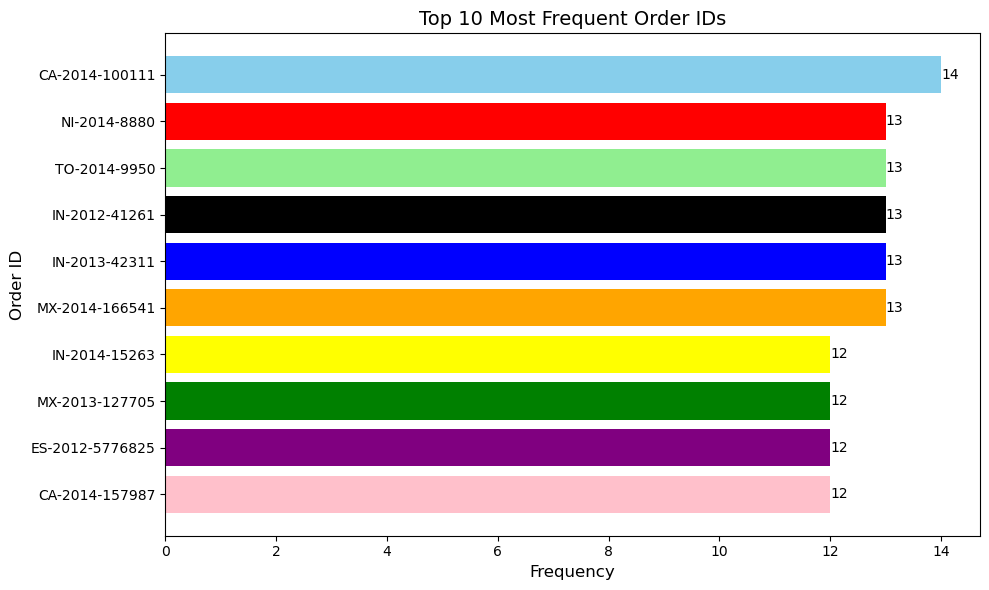

In [24]:
# Get the unique values and their counts
unique_ids, counts = data['Order ID'].value_counts().index, data['Order ID'].value_counts().values

# Define colors for bars
colors = ['skyblue', 'red', 'lightgreen', 'black', 'blue',
          'orange', 'yellow', 'green', 'purple', 'pink']

# Plot the bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(unique_ids[:10], counts[:10], color=colors)

# Add labels and title
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Order ID', fontsize=12)
plt.title('Top 10 Most Frequent Order IDs', fontsize=14)

# Add frequency labels on each bar
for bar, count in zip(bars, counts[:10]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}',
             va='center', ha='left', fontsize=10, color='black')

# Invert y-axis to display the highest frequency at the top
plt.gca().invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()


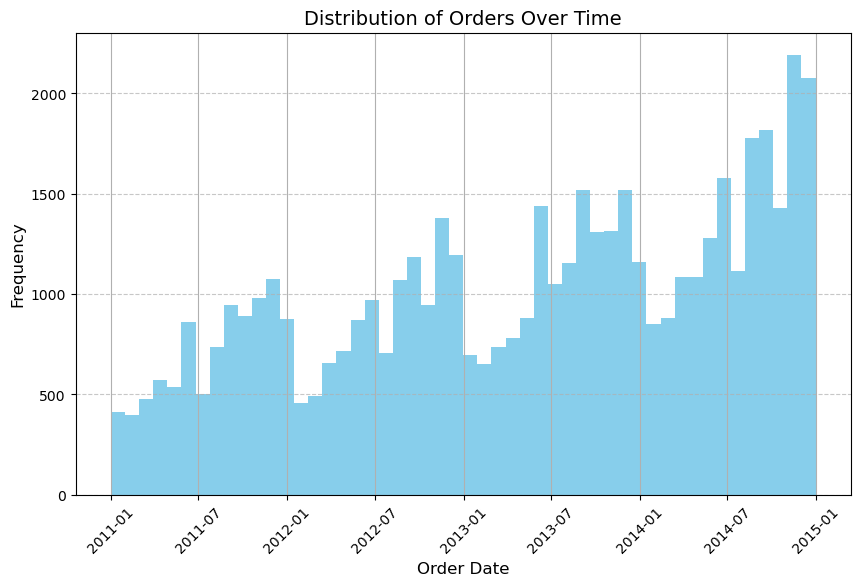

In [26]:
 
# Plot the histogram of order dates
plt.figure(figsize=(10, 6))
data['Order Date'].hist(bins=50, color='skyblue')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Orders Over Time', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()

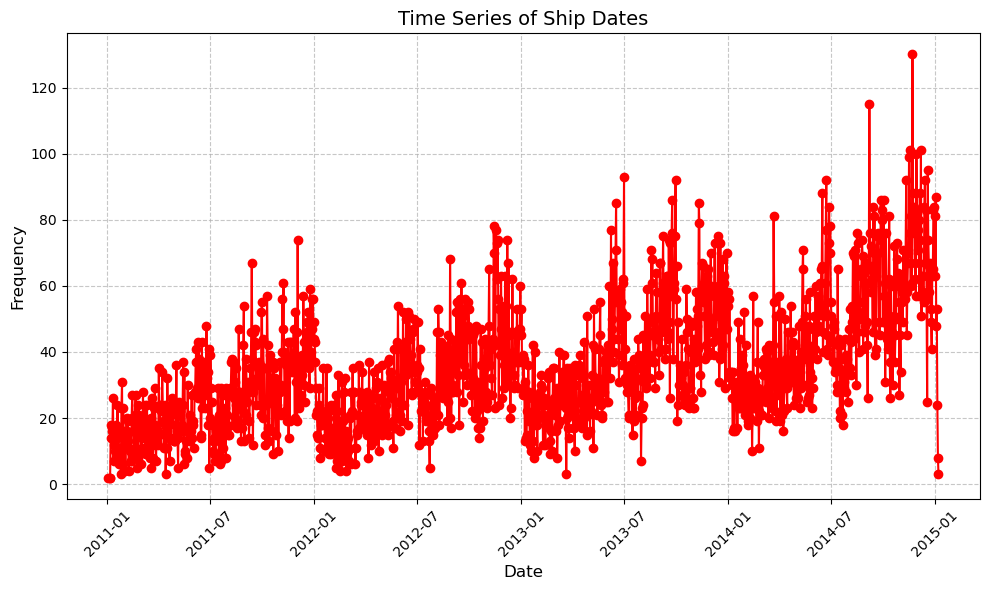

In [28]:

# Plot the time series of ship dates as a line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Ship Date'].value_counts().sort_index(), marker='o', color='red', linestyle='-')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Time Series of Ship Dates', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

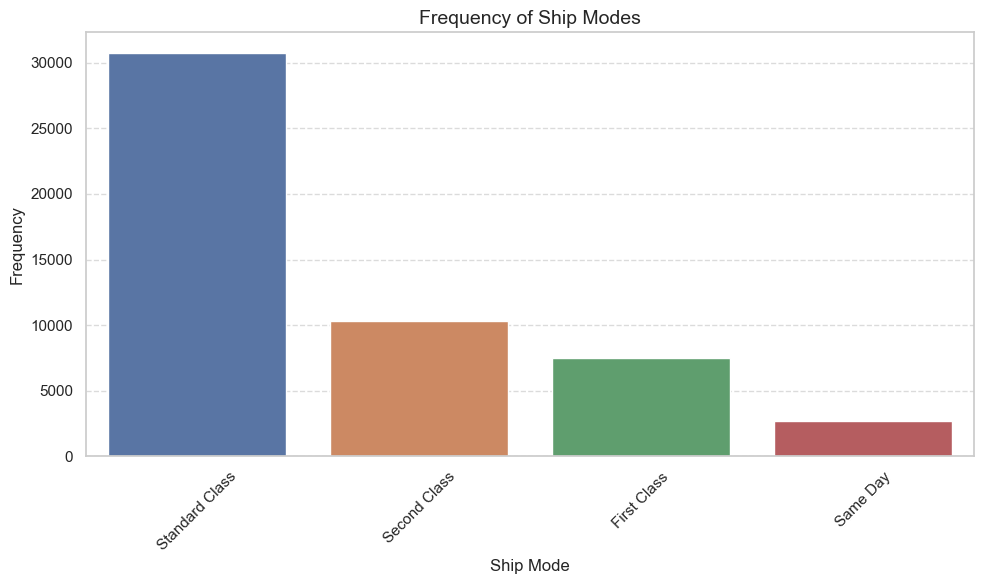

In [32]:


# Set Seaborn style
sns.set(style="whitegrid")

# Count the frequency of each ship mode
ship_mode_counts = data['Ship Mode'].value_counts()

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_counts.index, y=ship_mode_counts.values)
plt.title('Frequency of Ship Modes', fontsize=14)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

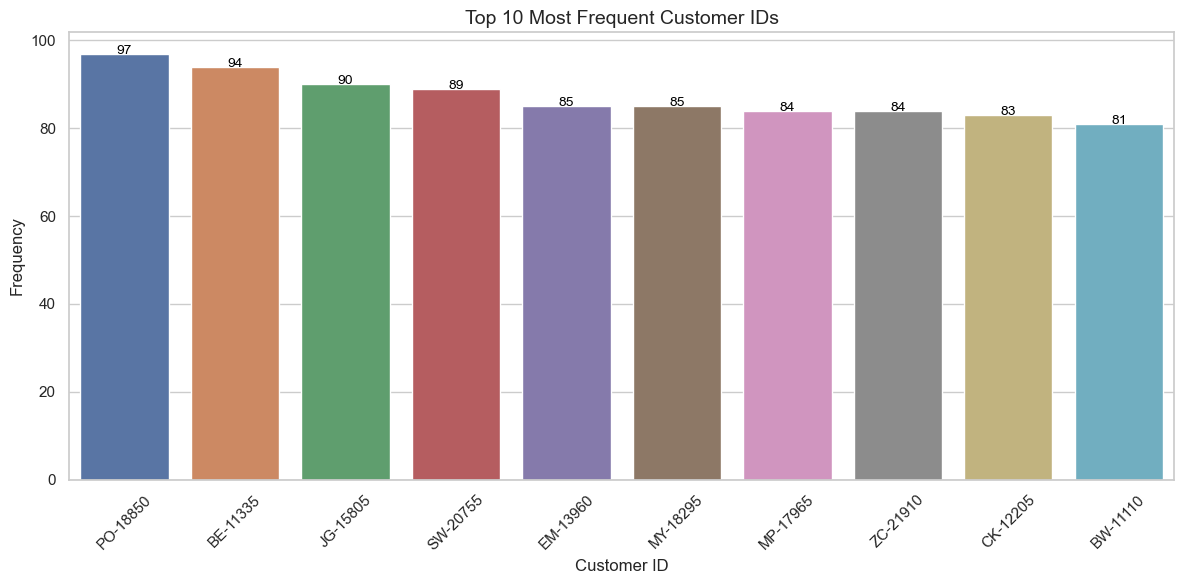

In [33]:



# Set Seaborn style
sns.set(style="whitegrid")

# Count the frequency of each customer ID
customer_id_counts = data['Customer ID'].value_counts()

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=customer_id_counts.index[:10], y=customer_id_counts.values[:10])
plt.title('Top 10 Most Frequent Customer IDs', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

# Adding annotations
for index, value in enumerate(customer_id_counts.values[:10]):
    barplot.text(index, value, str(value), ha="center", fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [35]:
! pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/0b/2b/2e77c35326efec19819cd1d729540d4d235e6c2a3f37658288a363a67da5/squarify-0.4.3-py3-none-any.whl.metadata


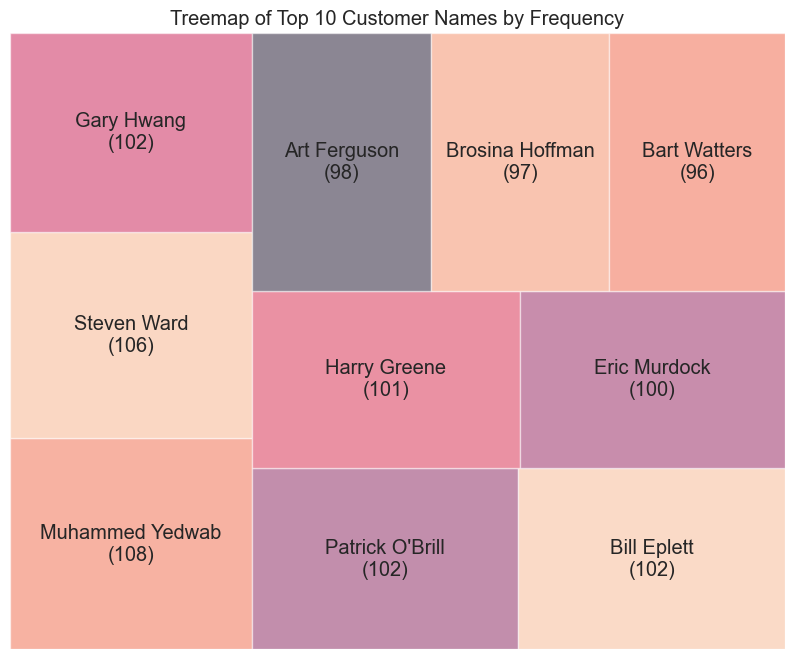

In [37]:

import squarify

# Get the frequency of each customer name
customer_name_counts = data['Customer Name'].value_counts()

# Selecting only the top 10 customers
top_10_customers = customer_name_counts.head(10)

# Prepare the labels with frequencies
labels = [f'{name}\n({count})' for name, count in zip(top_10_customers.index, top_10_customers.values)]

# Plotting the treemap with labeled frequencies
plt.figure(figsize=(10, 8))
squarify.plot(sizes=top_10_customers.values, label=labels, alpha=0.5)
plt.axis('off')
plt.title('Treemap of Top 10 Customer Names by Frequency')
plt.show()

['Consumer' 'Corporate' 'Home Office']
3


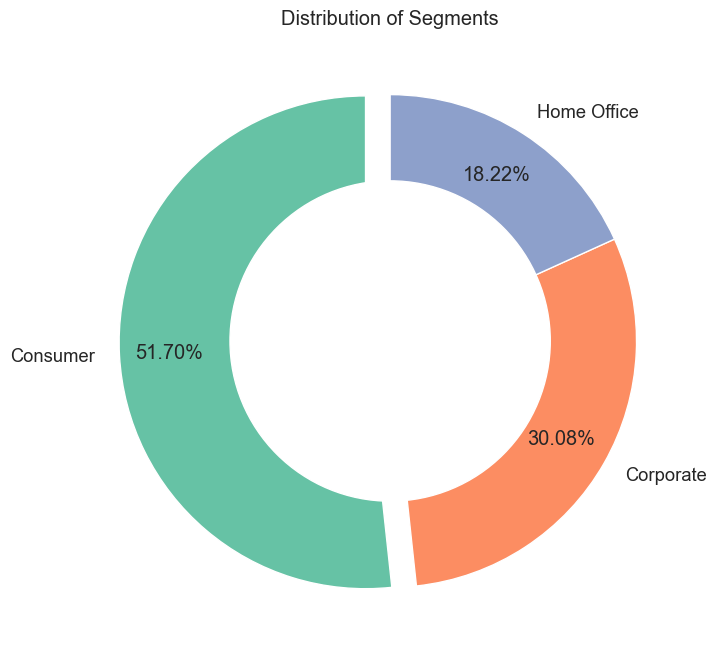

In [36]:

print(data['Segment'].unique())
print(data['Segment'].nunique())
     
['Consumer' 'Corporate' 'Home Office']
3


# Set the font scale for better readability
sns.set(font_scale=1.2)

# Get the unique values and their counts for the Segment column
segment_counts = data['Segment'].value_counts()

# Define explode values
explode = [0.1 if seg == 'Consumer' else 0 for seg in segment_counts.index]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(x=segment_counts, labels=segment_counts.index, colors=sns.color_palette('Set2'), startangle=90, autopct='%1.2f%%', pctdistance=0.80, explode=explode)

# Add a hole in the pie
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Distribution of Segments')
plt.show()

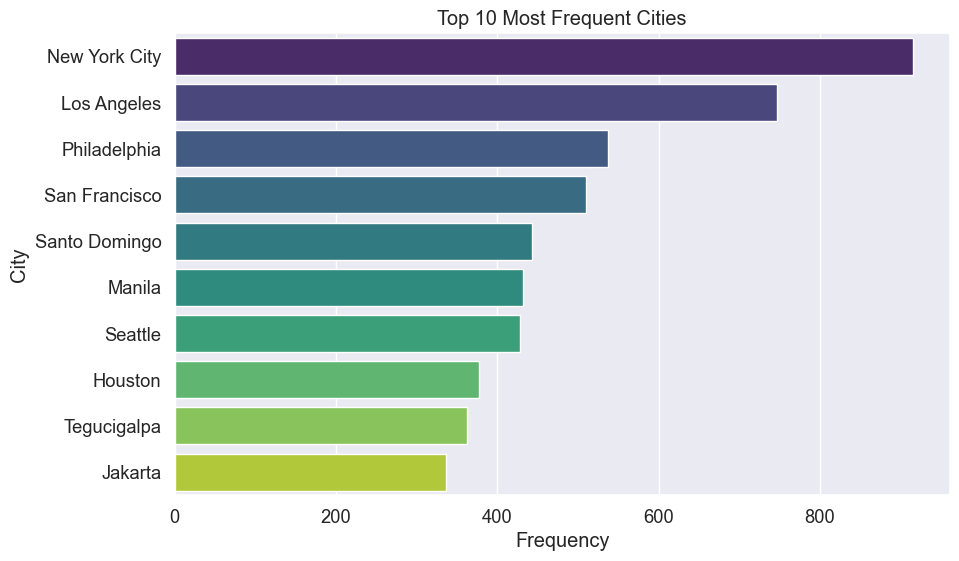

In [38]:
# Get the unique values and their counts for the City column
city_counts = data['City'].value_counts()

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=data, order=city_counts.index[:10], palette='viridis')
plt.title('Top 10 Most Frequent Cities')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.show()

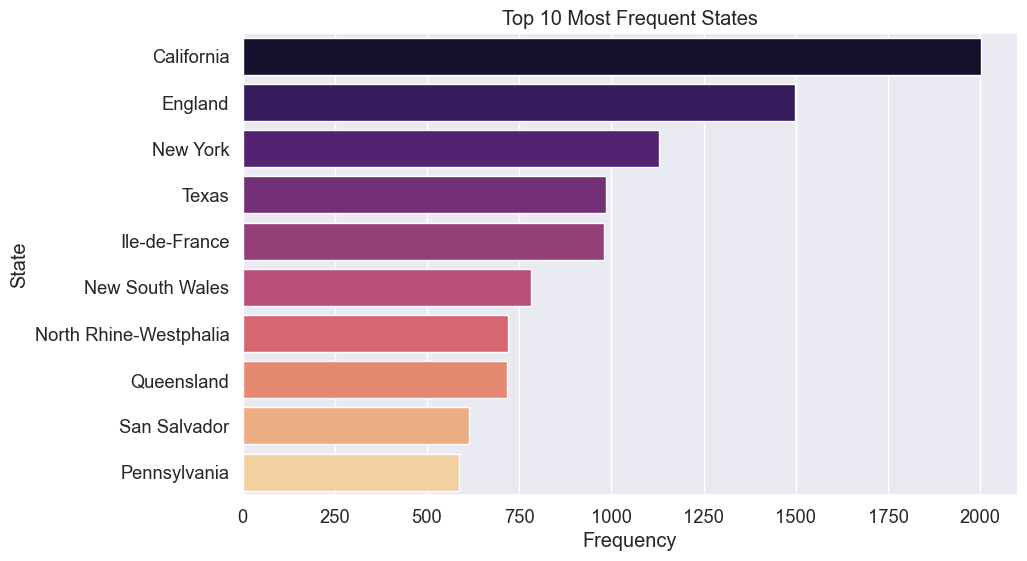

In [40]:
state_counts = data['State'].value_counts()

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='State', data=data, order=state_counts.index[:10], palette='magma')
plt.title('Top 10 Most Frequent States')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

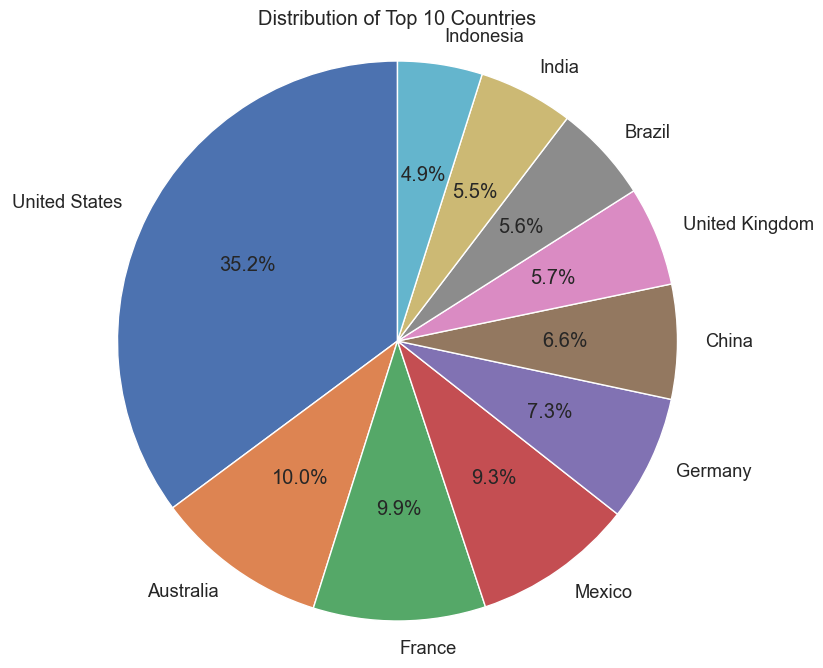

In [41]:
country_counts = data['Country'].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.color_palette("tab10")
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

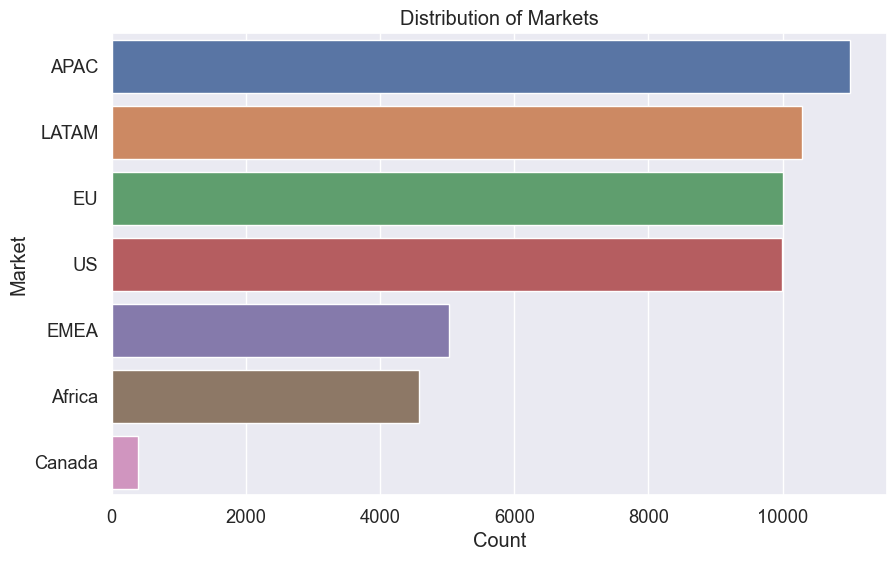

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Market', order=data['Market'].value_counts().index)
plt.title('Distribution of Markets')
plt.xlabel('Count')
plt.ylabel('Market')
plt.show()

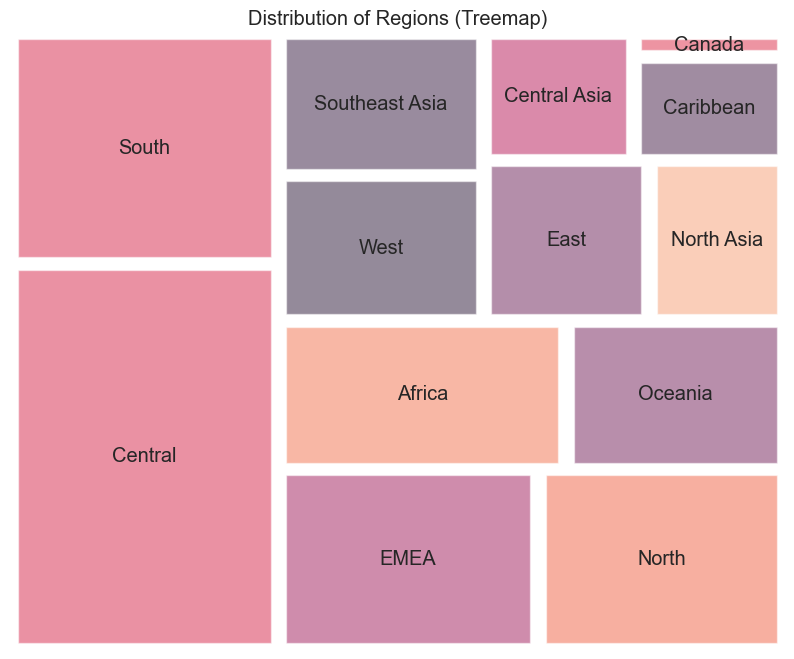

In [43]:

# Get the counts for each region
region_counts =data['Region'].value_counts()

# Create a squarify plot
plt.figure(figsize=(10, 8))
squarify.plot(sizes=region_counts, label=region_counts.index, alpha=0.5, pad=True)
plt.title('Distribution of Regions (Treemap)')
plt.axis('off')  # Turn off axis
plt.show()

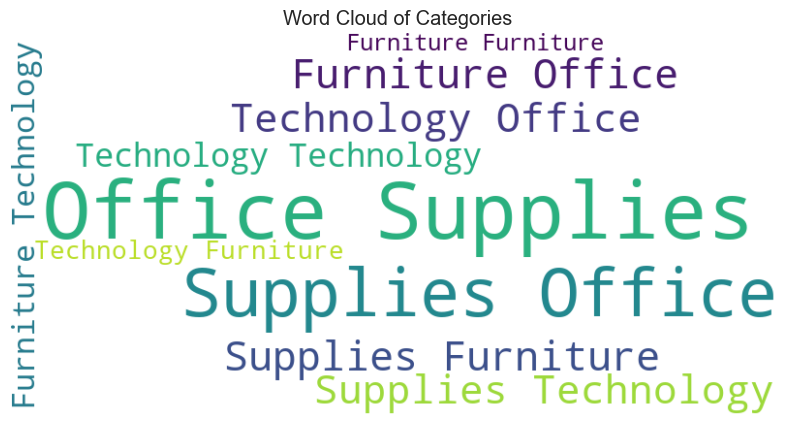

In [45]:
from wordcloud import WordCloud

# Concatenate all categories into a single string
categories_text = ' '.join(data['Category'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(categories_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Categories')
plt.axis('off')
plt.show()
     

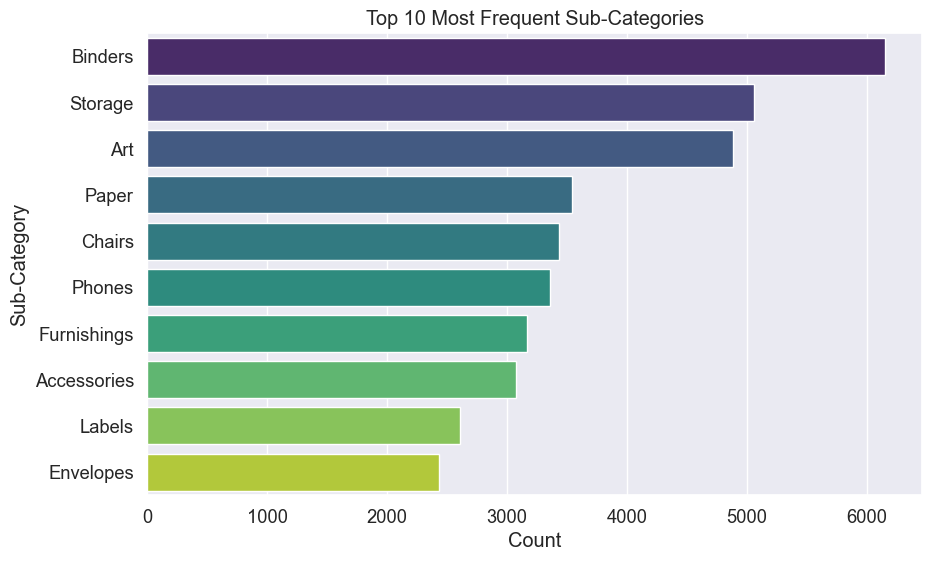

In [46]:
# Get the top 10 most frequent sub-categories and their counts
top_subcategories = data['Sub-Category'].value_counts().head(10)

# Create the vertical bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.title('Top 10 Most Frequent Sub-Categories')
plt.show()

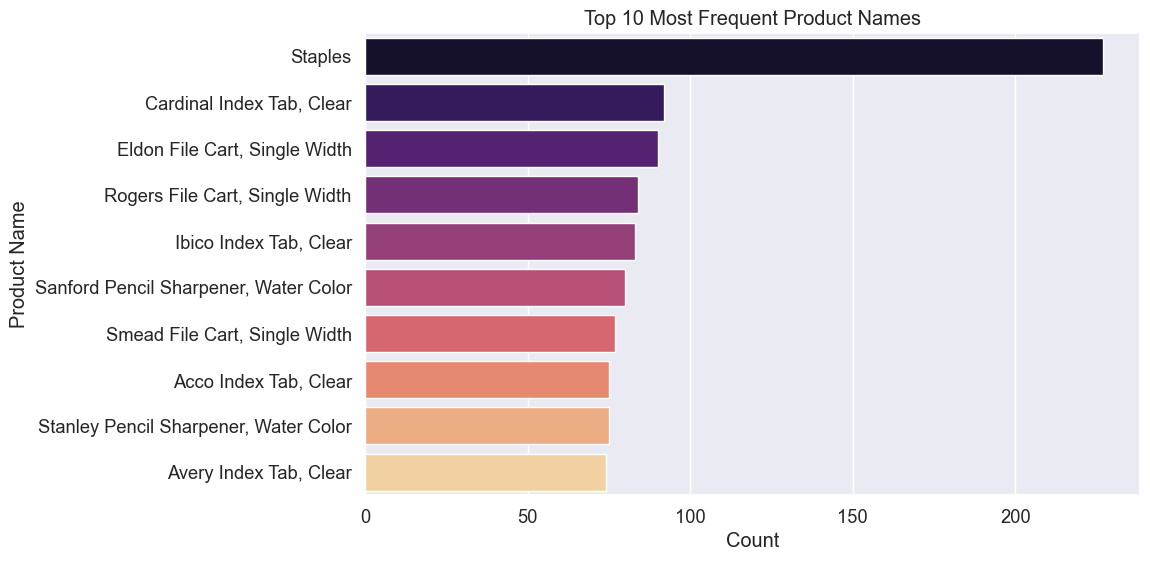

In [47]:
# Get the top 10 most frequent product names and their counts
top_product_names = data['Product Name'].value_counts().head(10)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_names.values, y=top_product_names.index, palette='magma')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top 10 Most Frequent Product Names')
plt.show()

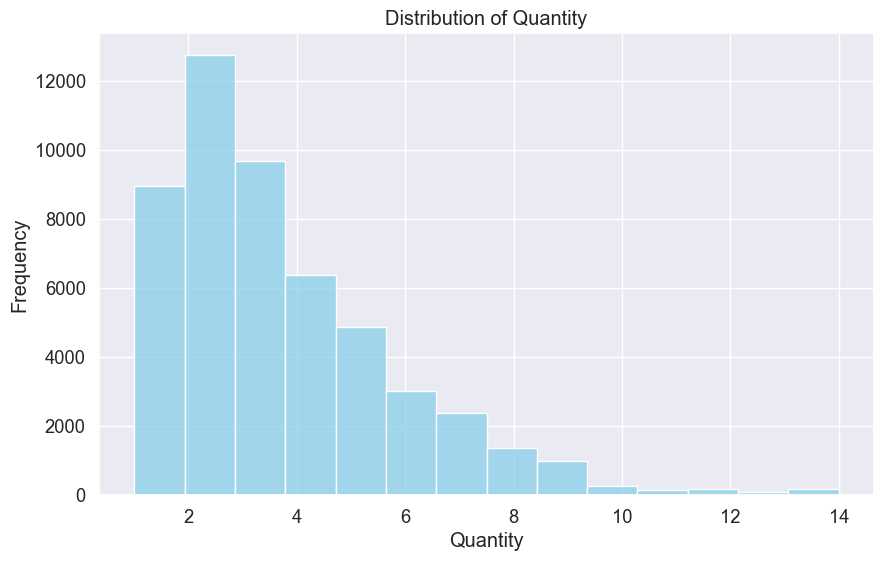

In [48]:

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=14, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.grid(True)
plt.show()


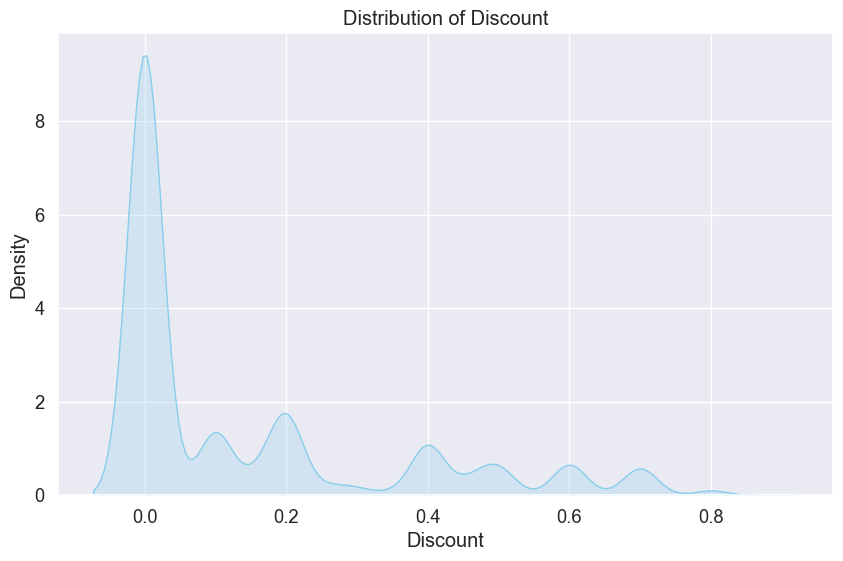

In [49]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Discount'], shade=True, color='skyblue')
plt.xlabel('Discount')
plt.ylabel('Density')
plt.title('Distribution of Discount')
plt.grid(True)
plt.show()

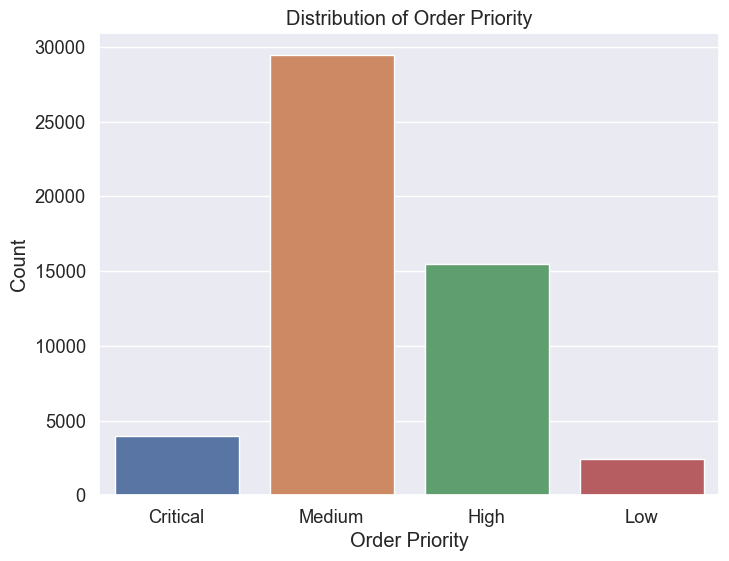

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Order Priority', data=data)
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.title('Distribution of Order Priority')
plt.show()

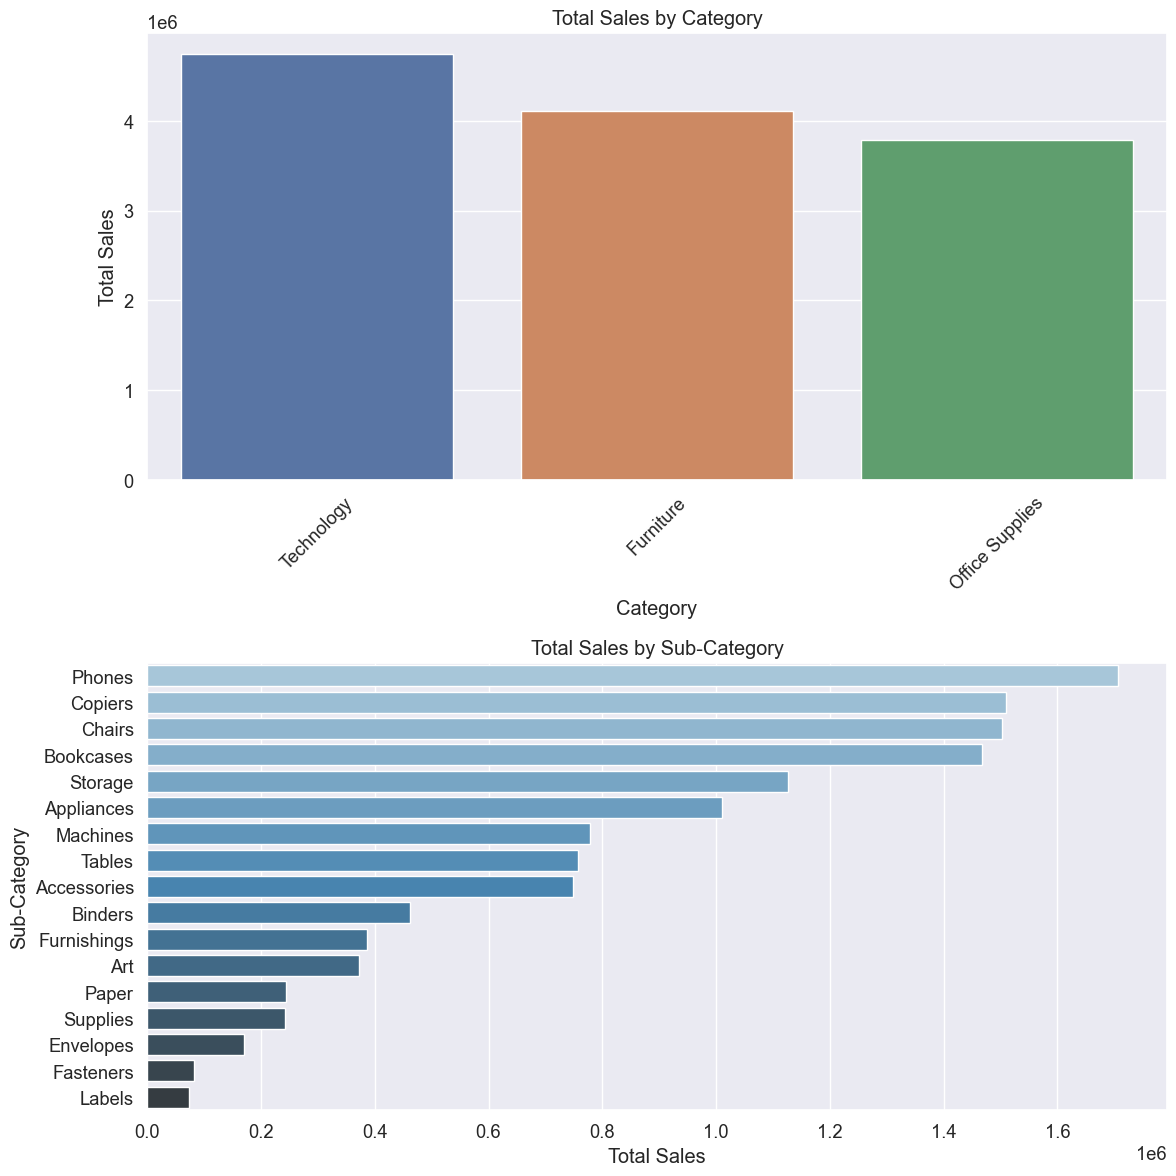

In [55]:
###Total sales by category and subcategory



total_sales_by_category = data.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Group the data by 'Sub-Category' and calculate total sales for each sub-category
total_sales_by_subcategory = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Total Sales by Category
sns.barplot(x='Category', y='Sales', data=total_sales_by_category, ax=axes[0])
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Total Sales by Sub-Category
sns.barplot(x='Sales', y='Sub-Category', data=total_sales_by_subcategory, ax=axes[1], palette='Blues_d')
axes[1].set_title('Total Sales by Sub-Category')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('Sub-Category')

plt.tight_layout()
plt.show()

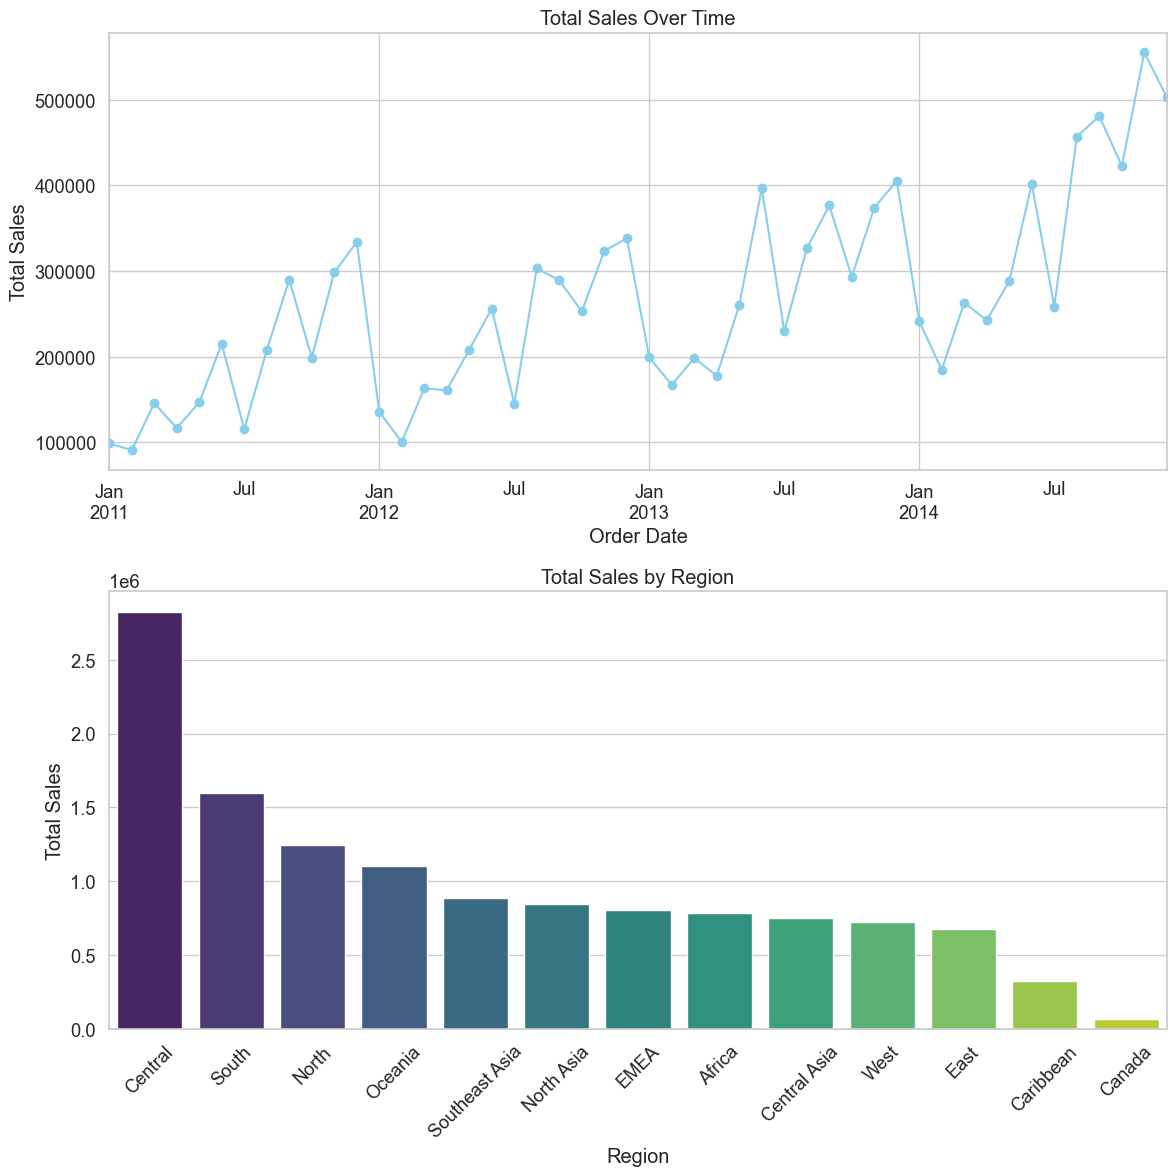

In [59]:
###Total sales over time and Total sales by Region


sns.set_style("whitegrid")

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Total Sales Over Time
data['Order Date'] = pd.to_datetime(data['Order Date'])  # Convert 'Order Date' to datetime
total_sales_over_time = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
total_sales_over_time.plot(ax=axes[0], marker='o', color='skyblue')
axes[0].set_title('Total Sales Over Time')
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Total Sales')

# Total Sales by Region
total_sales_by_region = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=total_sales_by_region.index, y=total_sales_by_region.values, ax=axes[1], palette='viridis')
axes[1].set_title('Total Sales by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

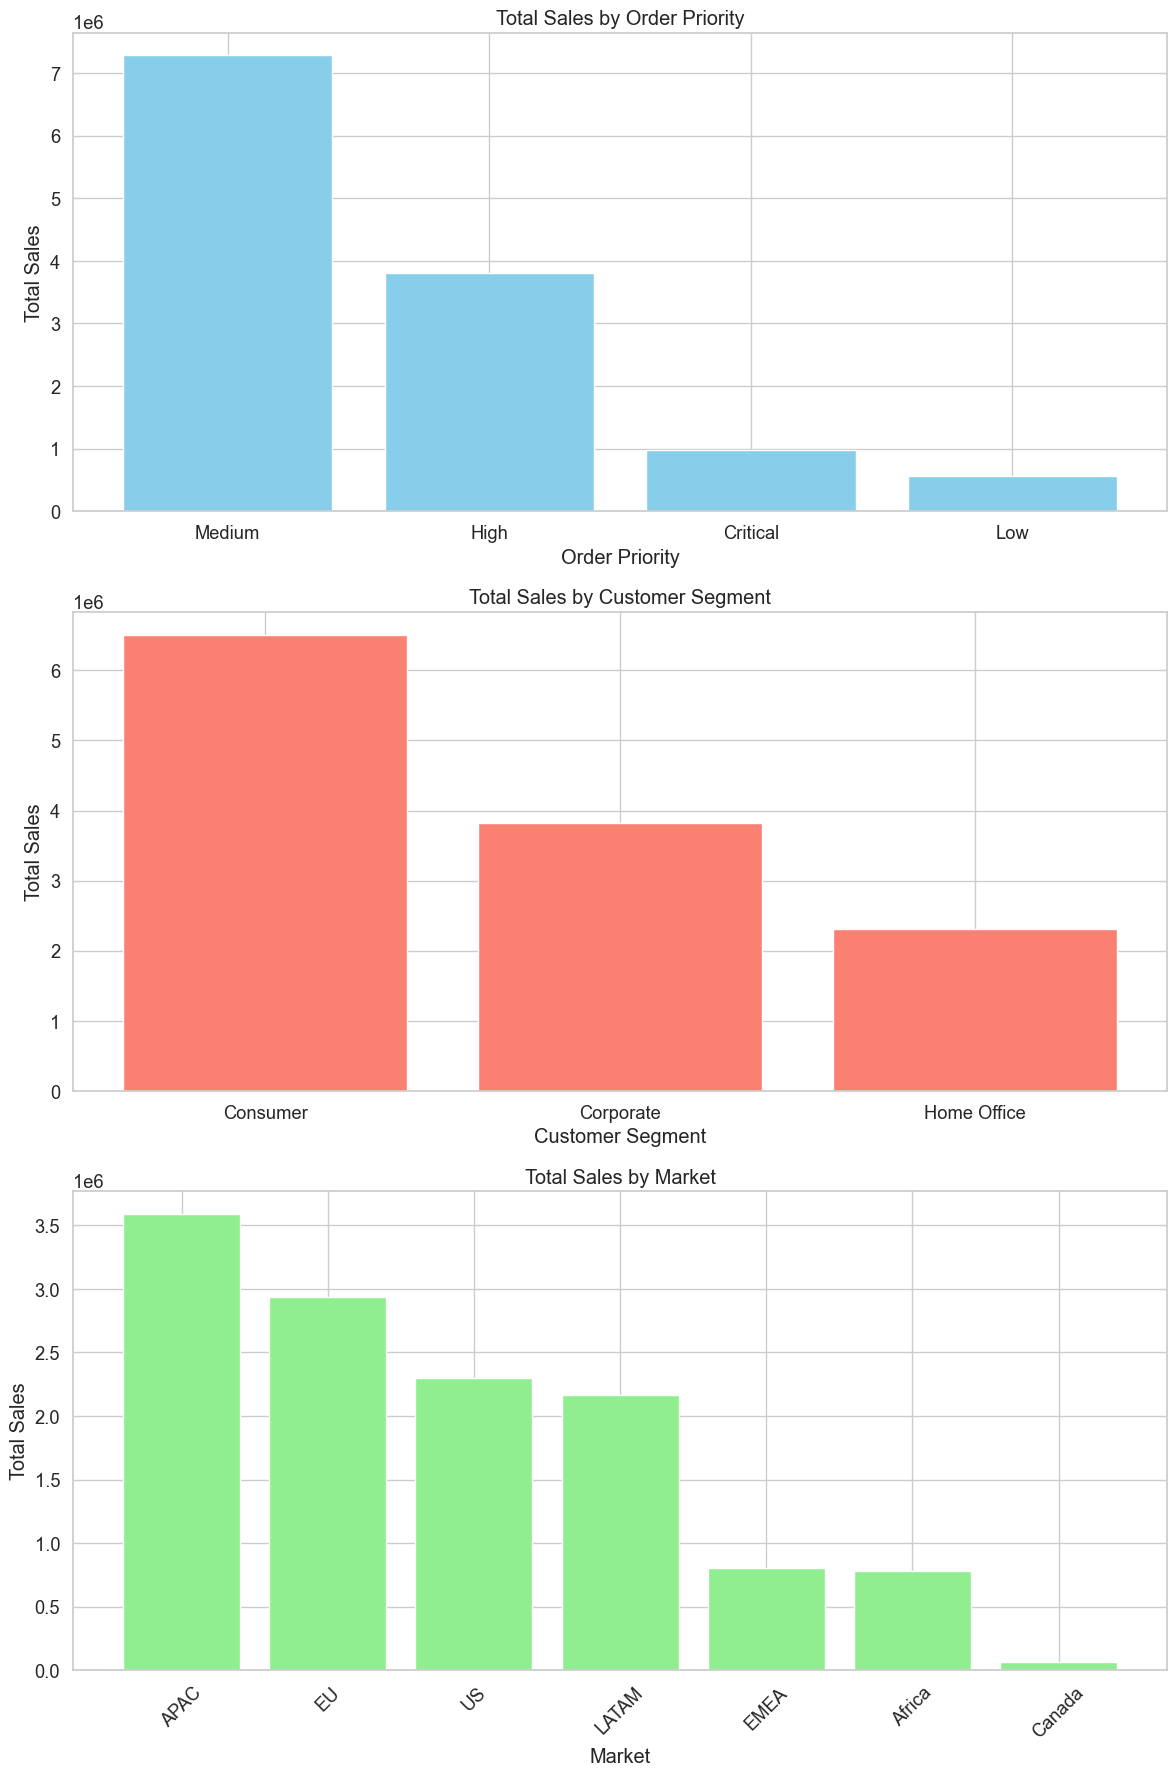

In [60]:
###Total sales by Order Priority,Customer Segment and Market


sns.set_style("whitegrid")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Total Sales by Order Priority
total_sales_by_order_priority = data.groupby('Order Priority')['Sales'].sum().sort_values(ascending=False)
axes[0].bar(total_sales_by_order_priority.index, total_sales_by_order_priority.values, color='skyblue')
axes[0].set_title('Total Sales by Order Priority')
axes[0].set_xlabel('Order Priority')
axes[0].set_ylabel('Total Sales')

# Total Sales by Customer Segment
total_sales_by_customer_segment = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
axes[1].bar(total_sales_by_customer_segment.index, total_sales_by_customer_segment.values, color='salmon')
axes[1].set_title('Total Sales by Customer Segment')
axes[1].set_xlabel('Customer Segment')
axes[1].set_ylabel('Total Sales')

# Total Sales by Market
total_sales_by_market = data.groupby('Market')['Sales'].sum().sort_values(ascending=False)
axes[2].bar(total_sales_by_market.index, total_sales_by_market.values, color='lightgreen')
axes[2].set_title('Total Sales by Market')
axes[2].set_xlabel('Market')
axes[2].set_ylabel('Total Sales')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [62]:
###best-selling products


total_sales_by_product = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Identifying the best-selling products (top 10)
best_selling_products = total_sales_by_product.head(10)

# Displaying the best-selling products
print("Top 10 Best-Selling Products:")
print(best_selling_products)
     


Top 10 Best-Selling Products:
Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


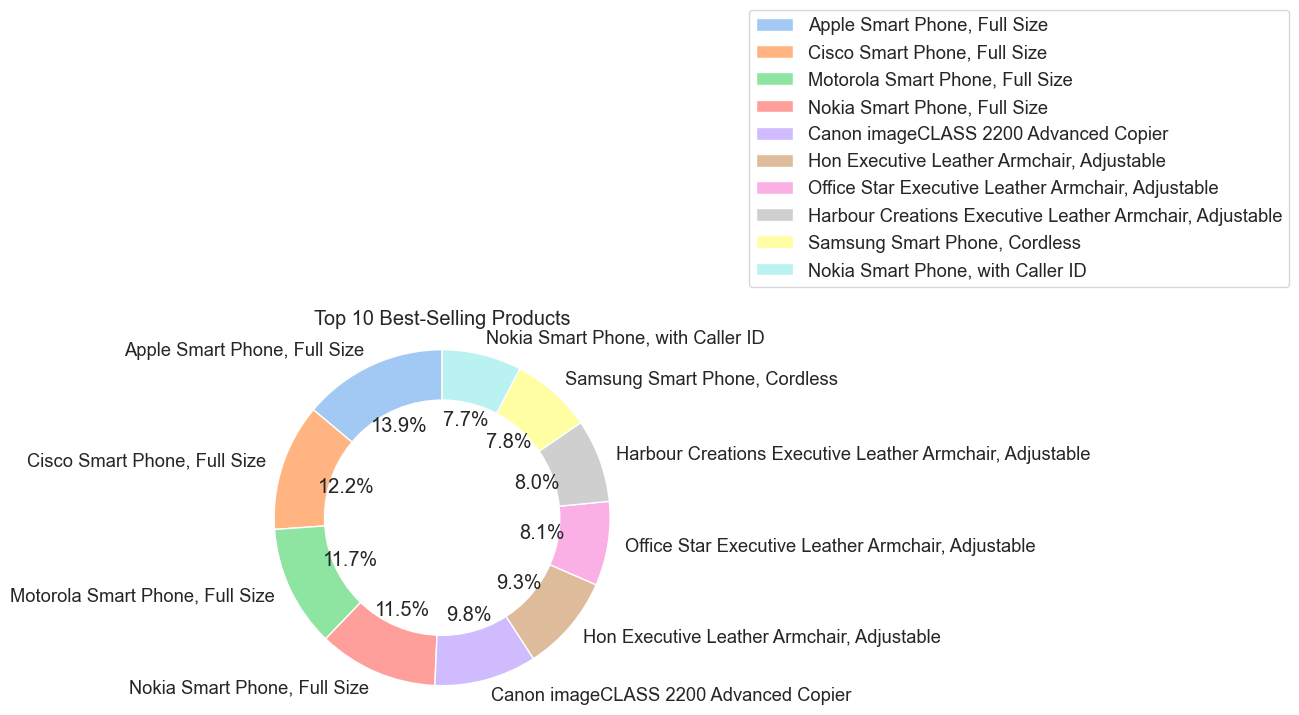

In [63]:
# Define colors for the pie chart
colors = sns.color_palette('pastel')[0:len(best_selling_products)]

# Plotting the donut chart
patches, texts, autotexts = plt.pie(best_selling_products, labels=best_selling_products.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Best-Selling Products')

# Draw a circle in the middle to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create legend based on sales
sorted_labels = [label for _, label in sorted(zip(best_selling_products, best_selling_products.index), reverse=True)]
plt.legend(handles=patches, labels=sorted_labels, loc="center left", bbox_to_anchor=(1.1, 1.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()
     